 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [15]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import math
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [16]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format=True)
# YOUR CODE HERE

In [17]:
# Count nulls
whale_returns.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [18]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [19]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
# YOUR CODE HERE

In [20]:
# Count nulls
algo_returns.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    6
dtype: int64

In [21]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()
# YOUR CODE HERE

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [22]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
# YOUR CODE HERE

In [23]:
# Check Data Types
sp500_history.dtypes
# YOUR CODE HERE

Close    object
dtype: object

In [24]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$','')
sp500_history['Close'] = sp500_history['Close'].astype(float)
# YOUR CODE HERE

In [25]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.pct_change()
daily_returns_sp500.head()
# YOUR CODE HERE

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [26]:
# Drop nulls
daily_returns_sp500.dropna(inplace=True)
daily_returns_sp500.head()
# YOUR CODE HERE

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [27]:
# Rename Column
daily_returns_sp500.columns= ['Daily Returns SP500']
daily_returns_sp500.head()
# YOUR CODE HERE

,Daily Returns SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Concatenate all DataFrames into a single DataFrame
whale_algo_sp500returns = pd.concat([whale_returns,algo_returns,daily_returns_sp500], axis = 'columns', join = 'inner')
whale_algo_sp500returns.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC',
                                 'Algo 1','Algo 2', 'Daily Returns SP500']
whale_algo_sp500returns.head()
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

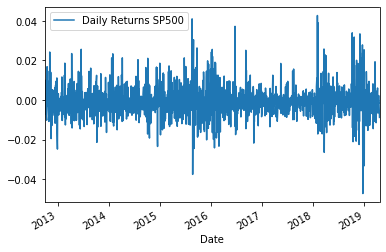

In [29]:
# Plot daily returns
daily_returns_sp500.plot()
# YOUR CODE HERE

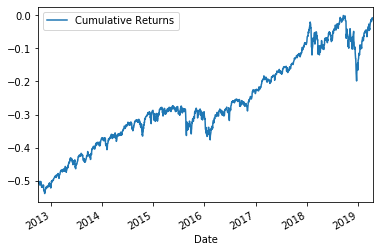

In [30]:
# Plot cumulative returns
cumulative_returns = (1+ daily_returns_sp500).cumprod() - 1
cumulative_returns.columns = ['Cumulative Returns']
cumulative_returns.plot()
# YOUR CODE HERE

In [31]:
cumulative_returns.head()

,Cumulative Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578


---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

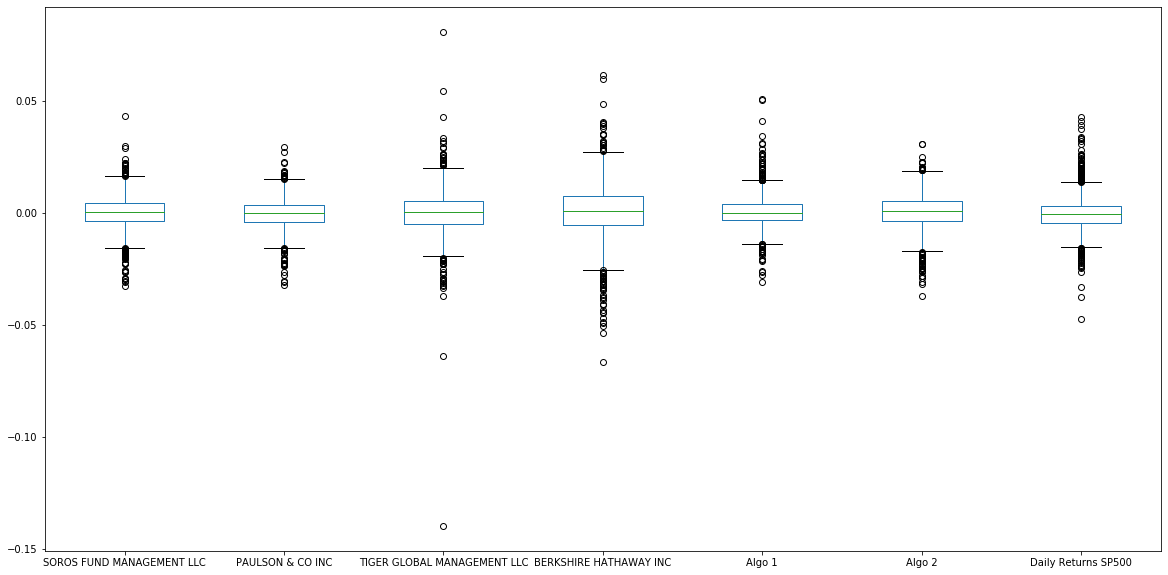

In [32]:
# Box plot to visually show risk
whale_algo_sp500returns.plot(kind='box',figsize=(20,10))
# YOUR CODE HERE

In [33]:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?

whale_algo_sp500returns_std = whale_algo_sp500returns.std()
whale_algo_sp500returns_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO INC               0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Daily Returns SP500            0.008587
dtype: float64

In [34]:
# Determine which portfolios are riskier than the S&P 500
for column in daily_std_whale_algo_sp500returns:
    if column
    
# YOUR CODE HERE

SyntaxError: invalid syntax (<ipython-input-34-a7a1475b9fc7>, line 3)

In [35]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = (whale_algo_sp500returns_std['Daily Returns SP500'])*(math.sqrt(252))
annualized_std
# YOUR CODE HERE

0.1363126488377286

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

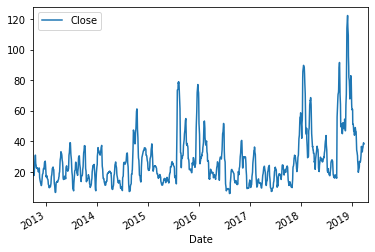

In [36]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
sp500_history.rolling(window=21).std().plot()
# YOUR CODE HERE

In [37]:
# Correlation
portfolio_correlation = whale_algo_sp500returns.corr()
portfolio_correlation
# YOUR CODE HERE

,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO INC,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Daily Returns SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [38]:
print('The Portfolio with the highest correlation to the S&P 500 is the Paulson & Co Inc Portfolio')

The Portfolio with the highest correlation to the S&P 500 is the Paulson & Co Inc Portfolio


In [39]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
variance_bh = whale_returns['BERKSHIRE HATHAWAY INC'].var()
covariance_bh = whale_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns_sp500['Daily Returns SP500'])
bh_beta = covariance_bh / variance_bh
print(f'The Beta for the Berkshire Hathaway Inc Portfolio is {bh_beta}')
# YOUR CODE HERE

The Beta for the Berkshire Hathaway Inc Portfolio is -0.009336829601298453


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [40]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [41]:
# Annualzied Sharpe Ratios
sharpe_ratio_soros= (252**0.5)*(whale_algo_sp500returns['SOROS FUND MANAGEMENT LLC'].mean()/whale_algo_sp500returns_std['SOROS FUND MANAGEMENT LLC'])
sharpe_ratio_paulson= (252**0.5)*(whale_algo_sp500returns['PAULSON & CO INC'].mean()/whale_algo_sp500returns_std['PAULSON & CO INC'])
sharpe_ratio_tiger= (252**0.5)*(whale_algo_sp500returns['TIGER GLOBAL MANAGEMENT LLC'].mean()/whale_algo_sp500returns_std['TIGER GLOBAL MANAGEMENT LLC'])
sharpe_ratio_berkshire= (252**0.5)*(whale_algo_sp500returns['BERKSHIRE HATHAWAY INC'].mean()/whale_algo_sp500returns_std['BERKSHIRE HATHAWAY INC'])
sharpe_ratio_algo1= (252**0.5)*(whale_algo_sp500returns['Algo 1'].mean()/whale_algo_sp500returns_std['Algo 1'])
sharpe_ratio_algo2= (252**0.5)*(whale_algo_sp500returns['Algo 2'].mean()/whale_algo_sp500returns_std['Algo 2'])
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

<BarContainer object of 6 artists>

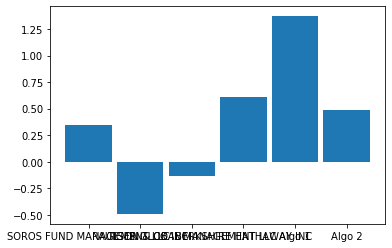

In [42]:
# Visualize the sharpe ratios as a bar plot
plt.bar(['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2'],
        [sharpe_ratio_soros, sharpe_ratio_paulson, sharpe_ratio_tiger,sharpe_ratio_berkshire, sharpe_ratio_algo1, sharpe_ratio_algo2], 
        width = 0.9) 

#How do I fix the fig size?

# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [106]:
# Read the first stock
airbus_historical_csv = Path("mystocks/airbus_historical.csv")
airbus_historical = pd.read_csv(airbus_historical_csv, index_col = 'Date', parse_dates = True, infer_datetime_format=True)
airbus_historical.columns = ['Airbus Close','Volume','Open','High','Low']
airbus_historical.drop(columns=['Volume','Open','High','Low'],inplace=True)
# YOUR CODE HERE

In [105]:
# Read the second stock
raytheon_historical_csv = Path("mystocks/raytheon_historical.csv")
raytheon_historical = pd.read_csv(raytheon_historical_csv, index_col = 'Date', parse_dates = True, infer_datetime_format=True)
raytheon_historical.columns = ['Raytheon Close','Volume','Open','High','Low']
raytheon_historical.drop(columns=['Volume','Open','High','Low'], inplace=True)
# YOUR CODE HERE

In [104]:
# Read the third stock
williamsonoma_historical_csv = Path("mystocks/williamsonoma_historical.csv")
williamsonoma_historical = pd.read_csv(williamsonoma_historical_csv, index_col = 'Date', parse_dates = True, infer_datetime_format=True)
williamsonoma_historical.columns = ['William Sonoma Close','Volume','Open','High','Low']
williamsonoma_historical.drop(columns=['Volume','Open','High','Low'],inplace=True)
# YOUR CODE HERE

In [107]:
# Concatenate all stocks into a single DataFrame
myportfolio = pd.concat([airbus_historical,raytheon_historical,williamsonoma_historical], axis = 'columns', join = 'inner')
myportfolio.head()
# YOUR CODE HERE

,Airbus Close,Raytheon Close,William Sonoma Close
Date,,,
2020-01-17,$152.41,$231.34,$76.59
2020-01-16,$149.10,$232.31,$76.52
2020-01-15,$149.81,$229.41,$75.57
2020-01-14,$150.45,$227.40,$76.01
2020-01-13,$150.31,$227.15,$75.52


In [ ]:
# Reset the index
# my index was set from the begining
# YOUR CODE HERE

In [108]:
myportfolio['Airbus Close'] = myportfolio['Airbus Close'].str.replace('$','')
myportfolio['Raytheon Close'] = myportfolio['Raytheon Close'].str.replace('$','')
myportfolio['William Sonoma Close'] = myportfolio['William Sonoma Close'].str.replace('$','')
myportfolio.head()

,Airbus Close,Raytheon Close,William Sonoma Close
Date,,,
2020-01-17,152.41,231.34,76.59
2020-01-16,149.10,232.31,76.52
2020-01-15,149.81,229.41,75.57
2020-01-14,150.45,227.40,76.01
2020-01-13,150.31,227.15,75.52


In [113]:
myportfolio['Airbus Close'] = myportfolio['Airbus Close'].astype(float)
myportfolio['Raytheon Close'] = myportfolio['Raytheon Close'].astype(float)
myportfolio['William Sonoma Close'] = myportfolio['William Sonoma Close'].astype(float)

In [114]:
# Drop Nulls
myportfolio.dropna(inplace=True)
myportfolio.isnull().sum()
# YOUR CODE HERE

Airbus Close            0
Raytheon Close          0
William Sonoma Close    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [117]:
# Calculate daily returnes for the portfolio
daily_returns_myportfolio = myportfolio.pct_change()
daily_returns_myportfolio.head()

,Airbus Close,Raytheon Close,William Sonoma Close
Date,,,
2020-01-17,NaN,NaN,NaN
2020-01-16,-0.021718,0.004193,-0.000914
2020-01-15,0.004762,-0.012483,-0.012415
2020-01-14,0.004272,-0.008762,0.005822
2020-01-13,-0.000931,-0.001099,-0.006447


In [131]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
myportfolio_weighted_returns = daily_returns_myportfolio.dot(weights)
myportfolio_weighted_returns.dropna(inplace=True)
myportfolio_weighted_returns.head()
# YOUR CODE HERE

Date
2020-01-16   -0.006146
2020-01-15   -0.006712
2020-01-14    0.000444
2020-01-13   -0.002825
2020-01-10   -0.007745
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [132]:
# YOUR CODE HERE
allportfolios = pd.concat([whale_algo_sp500returns, myportfolio_weighted_returns], axis = 'columns', join= 'inner')
allportfolios.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2',
                         'Daily Returns SP500', 'My Portfolio']
allportfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns SP500,My Portfolio
Date,,,,,,,,
2019-01-22,-0.014371,-0.011830,-0.008774,-0.022136,0.004236,-0.011539,-0.002198,0.004531
2019-01-23,-0.000520,0.000063,-0.000240,0.001897,0.009548,-0.002804,-0.001374,-0.010008
2019-01-24,0.005937,0.007146,-0.003748,0.012176,-0.002755,0.005871,-0.008417,-0.016527
2019-01-25,0.012897,0.010722,0.007476,0.021190,0.000384,0.010659,0.007909,0.003482
2019-01-28,-0.000713,-0.003858,0.002047,-0.005807,-0.009026,-0.003805,0.001458,-0.007302


In [134]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allportfolios.dropna(inplace=True)
allportfolios.isnull().sum()
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO INC               0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Daily Returns SP500            0
My Portfolio                   0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [136]:
# Risk (annualized STD)
allportfolios.std()*(math.sqrt(252))
# YOUR CODE HERE

SOROS FUND MANAGEMENT LLC      0.109829
PAULSON & CO INC               0.100837
TIGER GLOBAL MANAGEMENT LLC    0.304888
BERKSHIRE HATHAWAY INC         0.164623
Algo 1                         0.079507
Algo 2                         0.106449
Daily Returns SP500            0.095543
My Portfolio                   0.163601
dtype: float64

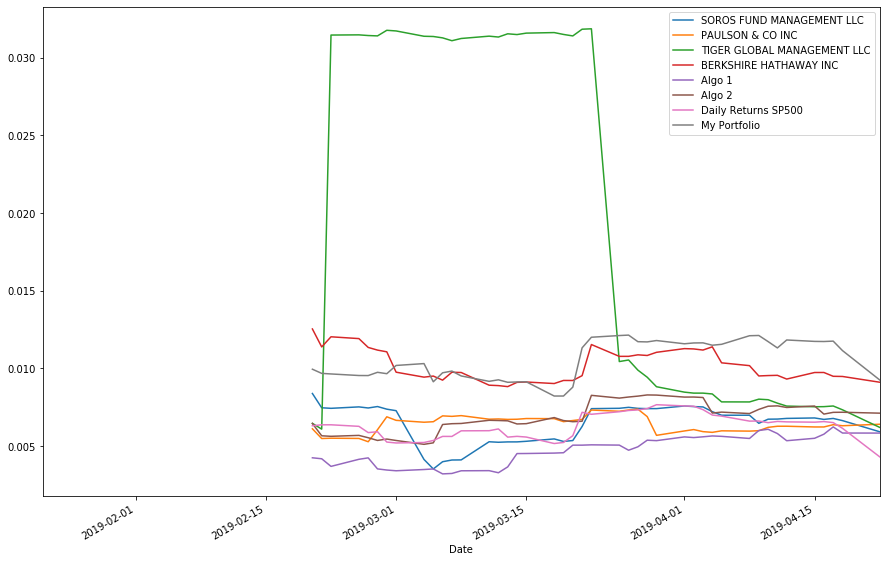

In [140]:
# Rolling
allportfolios.rolling(window=21).std().plot(figsize=(15,10))
# YOUR CODE HERE

In [142]:
# Beta
variance_my = myportfolio_weighted_returns.var()
covariance_my = myportfolio_weighted_returns.cov(daily_returns_sp500['Daily Returns SP500'])
my_beta = covariance_my / variance_my
print(f'The Beta for My Portfolio is {my_beta}')
# YOUR CODE HERE

The Beta for My Portfolio is 0.3901640650508623


In [144]:
# Annualized Sharpe Ratios
sharpe_ratio_myportfolio= (252**0.5)*(myportfolio_weighted_returns.mean()/myportfolio_weighted_returns.std())
sharpe_ratio_myportfolio
# YOUR CODE HERE

-1.99831660786584

<BarContainer object of 7 artists>

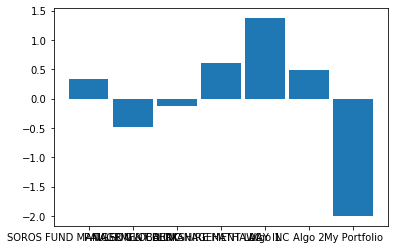

In [147]:
# Visualize the sharpe ratios as a bar plot
plt.bar(['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2','My Portfolio'],
        [sharpe_ratio_soros, sharpe_ratio_paulson, sharpe_ratio_tiger,sharpe_ratio_berkshire, sharpe_ratio_algo1, sharpe_ratio_algo2, sharpe_ratio_myportfolio], 
        width = 0.9)
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [150]:
# YOUR CODE HERE
mystock_correlation = myportfolio.corr()
mystock_correlation

,Airbus Close,Raytheon Close,William Sonoma Close
Airbus Close,1.000000,0.616069,0.747783
Raytheon Close,0.616069,1.000000,0.793906
William Sonoma Close,0.747783,0.793906,1.000000


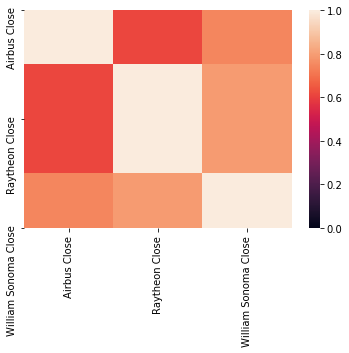

In [154]:
sns.heatmap(mystock_correlation, vmin=0, vmax = 1)